In [7]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [8]:
model = YOLO("./best.pt")


image 1/1 d:\Datasets\cow_muzzle_identifier\yolov8_muzzle\cow_images\J_6.jpg: 640x640 1 Mzzl, 64.8ms
Speed: 5.0ms preprocess, 64.8ms inference, 69.6ms postprocess per image at shape (1, 3, 640, 640)


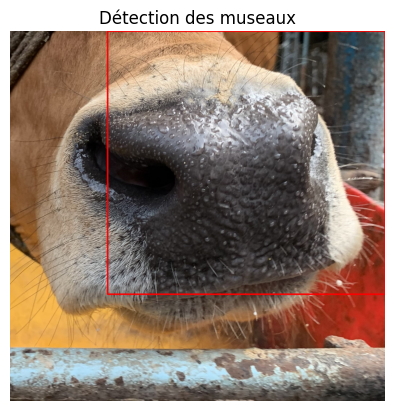

In [9]:

# Charger image
img_path = "./cow_images/J_6.jpg"
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Charger le modèle
results = model(img_path, conf=0.3)
boxes = results[0].boxes

# Dessiner les boîtes sur l'image
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 6)

# Afficher l'image avec les résultats
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Détection des museaux")
plt.show()


In [1]:
import requests

# Chemin de l'image à tester
image_path = "cow_images/J_22.jpg"

# URL de l'API (modifie avec l'adresse IP si tu testes depuis un autre appareil)
url = "http://192.168.11.30:8000/predict"

# Préparer la requête POST avec le fichier image
with open(image_path, "rb") as img_file:
    files = {"image": (image_path, img_file, "image/jpg")}
    response = requests.post(url, files=files)

# Afficher la réponse
print("Status Code:", response.status_code)
print("Response JSON:", response.json())


Status Code: 200
Response JSON: {'prediction': 'api', 'score': 0.9622278714282396}


In [14]:
import cv2
import requests
import os

# === CONFIGURATION ===
url = "http://192.168.11.30:8000/predict"  # API URL
temp_img_path = "temp_capture.jpg"     # Temp file for captured image

# === LANCEMENT DE LA CAMÉRA ===
cap = cv2.VideoCapture(0)
print("Appuie sur [ESPACE] pour capturer une image, ou [Q] pour quitter.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erreur lors de la lecture de la caméra.")
        break

    cv2.imshow("Appuie sur ESPACE pour capturer", frame)
    key = cv2.waitKey(1)

    if key % 256 == 32:  # Touche ESPACE
        # Sauvegarder l'image temporaire
        cv2.imwrite(temp_img_path, frame)
        print(f"[INFO] Image capturée et sauvegardée dans {temp_img_path}")

        # Envoyer l'image à l'API
        with open(temp_img_path, "rb") as img_file:
            files = {"image": (temp_img_path, img_file, "image/jpeg")}
            response = requests.post(url, files=files)

        if response.status_code == 200:
            data = response.json()
            label = data.get("prediction", "INCONNU")
            score = data.get("score", 0)
            print(f"[PRÉDICTION] Classe : {label} | Confiance : {score:.2f}")
        else:
            print(f"[ERREUR API] Code {response.status_code} : {response.text}")

        # Supprimer l'image temporaire
        if os.path.exists(temp_img_path):
            os.remove(temp_img_path)

    elif key % 256 == ord('q') or key % 256 == 27:  # Touche Q ou ÉCHAP
        print("Fermeture de la caméra.")
        break

cap.release()
cv2.destroyAllWindows()


Appuie sur [ESPACE] pour capturer une image, ou [Q] pour quitter.
[INFO] Image capturée et sauvegardée dans temp_capture.jpg
[PRÉDICTION] Classe : api | Confiance : 0.85
[INFO] Image capturée et sauvegardée dans temp_capture.jpg
[PRÉDICTION] Classe : api | Confiance : 0.87
Fermeture de la caméra.
